In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.

merge_df['Mouse ID'].count()

1893

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

249

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

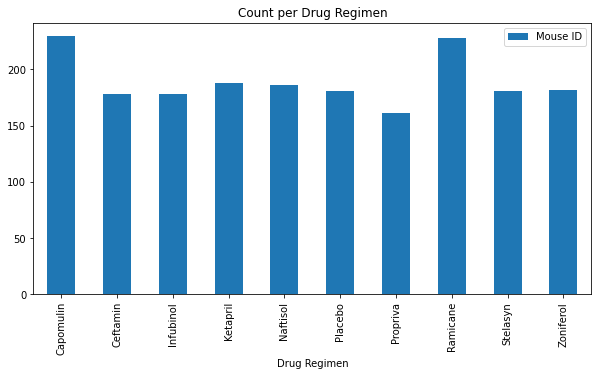

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_data = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()


In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = summary_df.index.tolist()
drug_regimen



['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [24]:
drug_list = (merge_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [29]:
x_axis = np.arange(len(drug_list))



<BarContainer object of 10 artists>

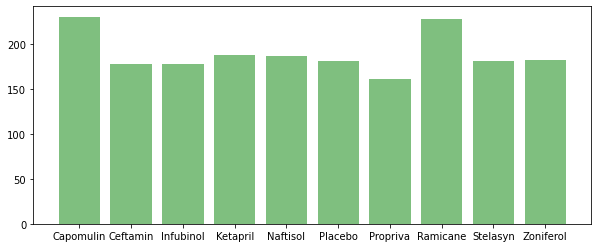

In [35]:
# Define x-axis
x_axis = drug_regimen
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_list, color='g', alpha=0.5, align="center")

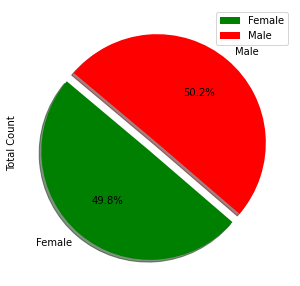

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_gender = merge_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Creating Pie Chart
colors = ['green', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")



([<matplotlib.patches.Wedge at 0x2a33ee537c0>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

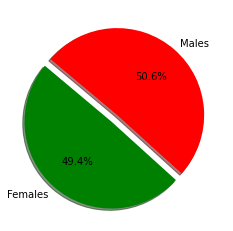

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (merge_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

# Create labels
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["green", "red"]

# Details to Pie chart
explode = (0.1, 0)


plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

merge_df.head()

# Start by getting the last (greatest) timepoint for each mouse

greatest_df = merge_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = greatest_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [76]:
# Put treatments into a list for for loop (and later for plot labels)

cap_data_df = merge_df[merge_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df

cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list


0      23.343598
1      25.472143
2      28.167397
3      28.328531
4      28.430964
         ...    
225    47.373423
226    47.488599
227    47.685963
228    48.070452
229    48.158209
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [75]:
ram_data_df = merge_df[merge_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df

ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0      22.050126
1      24.365505
2      26.546993
3      29.128472
4      30.276232
         ...    
223    46.910892
224    46.940945
225    47.001465
226    47.227171
227    47.622816
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [74]:
inf_data_df = merge_df[merge_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0      36.321346
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
173    67.685569
174    67.821420
175    67.973419
176    69.428141
177    72.226731
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [78]:
cef_data_df = merge_df[merge_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df

cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0      45.000000
1      45.000000
2      45.000000
3      45.000000
4      45.000000
         ...    
173    66.622836
174    67.527482
175    67.748662
176    68.594745
177    68.923185
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Capomulin Outlier plot of final volume total

quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of temperatures is: 37.685932865
The upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 7.314067135000002
The median of temperatures is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


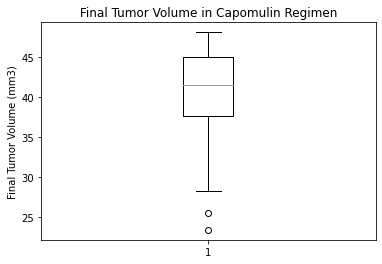

In [81]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [85]:
# Ramicane Outlier plot of final volume total
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 36.67463458499999
The upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 8.325365415000007
The median of temperatures is: 40.67323554
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


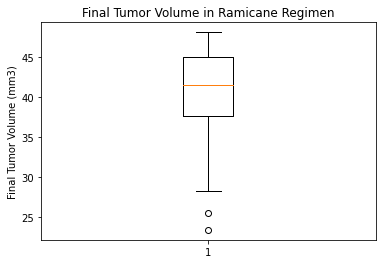

In [86]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [87]:
# Infubinol Outlier plot of final volume total
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 47.3123533
The upper quartile of temperatures is: 57.314443967500004
The interquartile range of temperatures is: 10.002090667500006
The median of temperatures is: 51.82058438
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


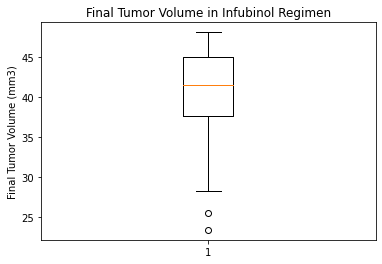

In [88]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [89]:
# Ceftamin Outlier plot of final volume total

quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 47.208427112500004
The upper quartile of temperatures is: 56.801437570000004
The interquartile range of temperatures is: 9.5930104575
The the median of temperatures is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


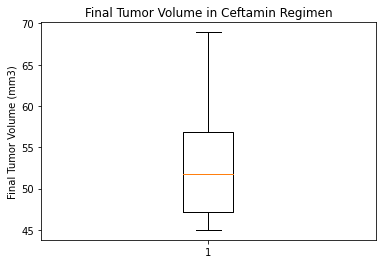

In [90]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [97]:
cap_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

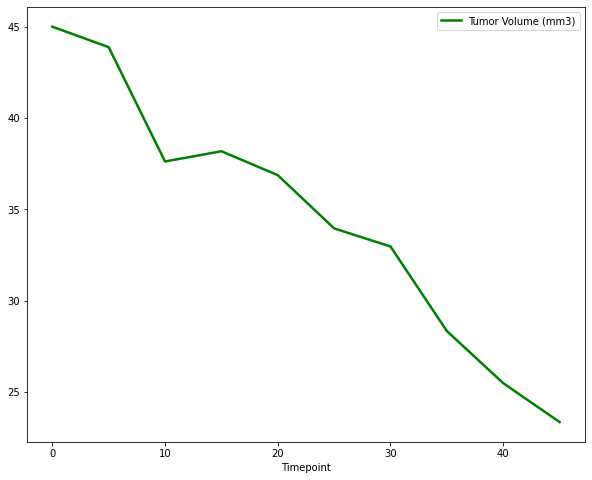

In [99]:
#Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="green")

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [102]:
# Calculate average tumor volume

average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


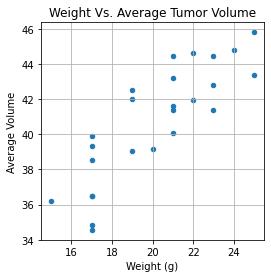

In [113]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()


In [121]:
# Calculate the correlation coefficient and linear regression model 

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


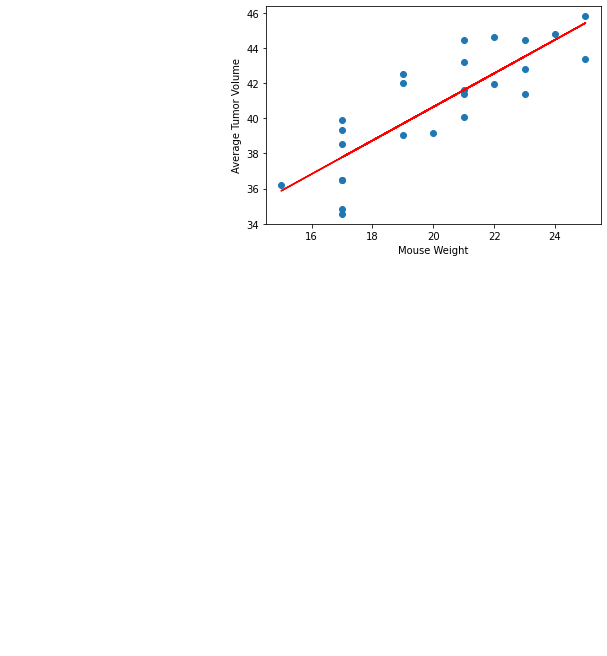

In [124]:
# import linregress
from scipy.stats import linregress

x_values = average_cap["Weight (g)"]
y_values = average_cap["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()